# VRNOF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_vrnof = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/vrnof.csv')
df_vrnof['Date'] = pd.to_datetime(df_vrnof['Date'])
df_vrnof = df_vrnof.set_index('Date')
df_vrnof = df_vrnof.rename(columns={'Open':'vrnof_Open', 'High':'vrnof_High', 'Low':'vrnof_Low', 'Close':'vrnof_Close', 'Volume':'vrnof_Volume'})
df_vrnof = df_vrnof.drop('Adj Close', axis=1)
df_vrnof['vrnof_prev_close'] = df_vrnof['vrnof_Close'].shift(1)
df_vrnof['vrnof_next_close'] = df_vrnof['vrnof_Close'].shift(-1)
df_vrnof['vrnof_diff'] = df_vrnof['vrnof_Close'].diff()
df_vrnof['vrnof_%change'] = df_vrnof['vrnof_Close'].pct_change()
df_vrnof['vrnof_5day_avg_close'] = df_vrnof['vrnof_Close'].rolling(5).mean()
df_vrnof['vrnof_5day_avg_diff'] = df_vrnof['vrnof_diff'].rolling(5).mean()
df_vrnof['vrnof_10day_avg_close'] = df_vrnof['vrnof_Close'].rolling(10).mean()
df_vrnof['vrnof_10day_avg_diff'] = df_vrnof['vrnof_diff'].rolling(10).mean()

In [4]:
df_vrnof

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520               NaN   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff  
Date                              
2021-02-18                   NaN  
2021-02-19                   NaN  
2021-02-22                   NaN  
2021-02-23                   NaN  
2021-02-24                   NaN  
...                          ...  
2022-05-17                -0.078  
2022-05-18                -0.095  
2022-05-19                -0.058  
2022-05-20                -0.026  
2022-05-23                 0.000  

[319 rows x 13 columns]

In [5]:
cut = df_vrnof.index.min()
cut

Timestamp('2021-02-18 00:00:00')

Text(0.5, 0, 'VRNOF Close')

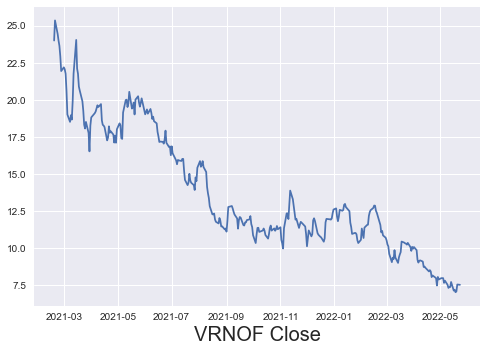

In [6]:
plt.plot(df_vrnof['vrnof_Close'])
plt.xlabel('VRNOF Close', fontsize=20)

## VRNOF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_vrnof, df_dow, on='Date', how='left')
df0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520               NaN   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                   NaN   31558.60   31558.60  31285.32    31493.34   
2021-02-19                   NaN   31504.13   31647.53  31469.34    31494.32   
2021-02-22                   NaN   31381.12   31653.48  31286.57    31521.69   
2021-02-23                   NaN   31501.89   31653.38  31158.76    31537.35   
2021-02-24                   NaN   31499.75   32009.64  31421.29    31961.86   
...                          ...        ...        ...       ...         ...   
2022-05-17                -0.078   32427.00   32689.14  32308.15    32654.59   
2022-05-18                -0.095   32468.67   32468.67  31393.95    31490.07   
2022-05-19                -0.058   31262.62   31569.13  31016.41    31253.13   
2022-05-20                -0.026   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                  True      False      False     False       False   
2021-02-19                  True      False      False     False       False   
2021-02-22                  True      False      False     False       False   
2021-02-23                  True      False      False     False       False   
2021-02-24                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                   0.0   31558.60   31558.60  31285.32    31493.34   
2021-02-19                   0.0   31504.13   31647.53  31469.34    31494.32   
2021-02-22                   0.0   31381.12   31653.48  31286.57    31521.69   
2021-02-23                   0.0   31501.89   31653.38  31158.76    31537.35   
2021-02-24                   0.0   31499.75   32009.64  31421.29    31961.86   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-02-18  369535872.0         31613.02         31494.32    -119.68   
2021-02-19  402127643.0         31493.34         31521.69       0.98   
2021-02-22  462830059.0         31494.32         31537.35      27.37   
2021-02-23  532120363.0         31521.69         31961.86      15.66   
2021-02-24  473681244.0         31537.35         31402.01     424.51   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-02-18     -0.003786            31503.642              11.108   
2021-02-19      0.000031            31516.366              12.724   
2021-02-22      0.000869            31529.024              12.658   
2021-02-23      0.000497            31531.944               2.920   
2021-02-24      0.013461            31601.712              69.768   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2021-02-18             31392.170               76.974  
2021-02-19             31436.016               43.846  
2021-02-22             31473.361               37.345  
2021-02-23             31488.520               15.159  
2021-02-24             31547.123               58.603

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520          0.000000   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                 0.000   31558.60   31558.60  31285.32    31493.34   
2021-02-19                 0.000   31504.13   31647.53  31469.34    31494.32   
2021-02-22                 0.000   31381.12   31653.48  31286.57    31521.69   
2021-02-23                 0.000   31501.89   31653.38  31158.76    31537.35   
2021-02-24                 0.000   31499.75   32009.64  31421.29    31961.86   
...                          ...        ...        ...       ...         ...   
2022-05-17                -0.078   32427.00   32689.14  32308.15    32654.59   
2022-05-18                -0.095   32468.67   32468.67  31393.95    31490.07   
2022-05-19                -0.058   31262.62   31569.13  31016.41    31253.13   
2022-05-20                -0.026   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                  0.0                    0.0                   0.0   
2021-02-19                  0.0                    0.0                   0.0   
2021-02-22                  0.0                    0.0                   0.0   
2021-02-23                  0.0                    0.0                   0.0   
2021-02-24                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2021-02-18   31558.60   31558.60  31285.32    31493.34  369535872.0   
2021-02-19   31504.13   31647.53  31469.34    31494.32  402127643.0   
2021-02-22   31381.12   31653.48  31286.57    31521.69  462830059.0   
2021-02-23   31501.89   31653.38  31158.76    31537.35  532120363.0   
2021-02-24   31499.75   32009.64  31421.29    31961.86  473681244.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2021-02-18         31613.02         31494.32    -119.68     -0.003786   
2021-02-19         31493.34         31521.69       0.98      0.000031   
2021-02-22         31494.32         31537.35      27.37      0.000869   
2021-02-23         31521.69         31961.86      15.66      0.000497   
2021-02-24         31537.35         31402.01     424.51      0.013461   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2021-02-18            31503.642              11.108             31392.170   
2021-02-19            31516.366              12.724             31436.016   
2021-02-22            31529.024              12.658             31473.361   
2021-02-23            31531.944               2.920             31488.520   
2021-02-24            31601.712              69.768             31547.123   

            djix_10day_avg_diff  vrnof_Open_b  vrnof_High_b  vrnof_Low_b  \
Date                                                                       
2021-02-18               76.974         False         False        False   
2021-02-19               43.846         False         False        False   
2021-02-22               37.345         False         False        False   
2021-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(318, 56)

In [18]:
n = int(len(df0) * 0.9)
n

286

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

286
32


In [21]:
X_train0 = train0.drop('vrnof_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-02-18                    0.0                   0.0   31558.60   31558.60   
2021-02-19                    0.0                   0.0   31504.13   31647.53   
2021-02-22                    0.0                   0.0   31381.12   31653.48   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-02-18  31285.32    31493.34  369535872.0         31613.02   
2021-02-19  31469.34    31494.32  402127643.0         31493.34   
2021-02-22  31286.57    31521.69  462830059.0         31494.32   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-02-18         31494.32    -119.68     -0.003786            31503.642   
2021-02-19         31521.69       0.98      0.000031            31516.366   
2021-02-22         31537.35      27.37      0.000869            31529.024   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-02-18              11.108             31392.170               76.974   
2021-02-19              12.724             31436.016               43.846   
2021-02-22              12.658             31473.361               37.345   

            vrnof_Open_b  vrnof_High_b  vrnof_Low_b  vrnof_Close_b  \
Date                                                                 
2021-02-18         False         False        False          False   
2021-02-19         False         False        False          False   
2021-02-22         False         False        False          False   

            vrnof_Volume_b  vrnof_prev_close_b  vrnof_next_close_b  \
Date                                                                 
2021-02-18           False                True               False   
2021-02-19           False               False               False   
2021-02-22           False               False               False   

            vrnof_diff_b  vrnof_%change_b  vrnof_5day_avg_close_b  \
Date                                                                
2021-02-18          True             True                    True   
2021-02-19         False            False                    True   
2021-02-22         False            False                    True   

            vrnof_5day_avg_diff_b  vrnof_10day_avg_close_b  \
Date                                                         
2021-02-18                   True                     True   
2021-02-19                   True                     True   
2021-02-22                   True                     True   

            vrnof_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(286, 55)

In [23]:
y_train0 = train0['vrnof_next_close']
y_train0.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('vrnof_next_close', axis=1)
y_test0 = test0['vrnof_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-04-06      4    6  2022        2        9.24       9.280       8.82   
2022-04-07      4    7  2022        2        8.75       9.140       8.56   
2022-04-08      4    8  2022        2        8.89       9.355       8.88   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-04-06         9.00        518700              9.19       -0.19   
2022-04-07         9.12        822500              9.00        0.12   
2022-04-08         9.15        322400              9.12        0.03   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-04-06      -0.020675                 9.604               -0.212   
2022-04-07       0.013333                 9.440               -0.164   
2022-04-08       0.003289                 9.260               -0.180   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-04-06                  9.846                -0.128   34520.34   34609.84   
2022-04-07                  9.737                -0.109   34439.24   34705.83   
2022-04-08                  9.619                -0.118   34569.24   34908.46   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-04-06  34277.17    34496.51  434859407.0         34641.18   
2022-04-07  34190.95    34583.57  384117327.0         34496.51   
2022-04-08  34470.19    34721.12  351166379.0         34583.57   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-04-06         34583.57    -144.67     -0.004176            34711.238   
2022-04-07         34721.12      87.06      0.002524            34692.282   
2022-04-08         34308.08     137.55      0.003977            34672.852   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-04-06            -146.460             34860.426               13.801   
2022-04-07             -18.956             34847.989              -12.437   
2022-04-08             -19.430             34833.977              -14.012   

            vrnof_Open_b  vrnof_High_b  vrnof_Low_b  vrnof_Close_b  \
Date                                                                 
2022-04-06         False         False        False          False   
2022-04-07         False         False        False          False   
2022-04-08         False         False        False          False   

            vrnof_Volume_b  vrnof_prev_close_b  vrnof_next_close_b  \
Date                                                                 
2022-04-06           False               False               False   
2022-04-07           False               False               False   
2022-04-08           False               False               False   

            vrnof_diff_b  vrnof_%change_b  vrnof_5day_avg_close_b  \
Date                                                                
2022-04-06         False            False                   False   
2022-04-07         False            False                   False   
2022-04-08         False            False                   False   

            vrnof_5day_avg_diff_b  vrnof_10day_avg_close_b  \
Date                                                         
2022-04-06                  False                    False   
2022-04-07                  False                    False   
2022-04-08                  False                    False   

            vrnof_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(32, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([8.76115525, 9.08734553, 8.9859715 , 8.84572903, 8.65090304])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.416870727018617


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.3500529654061747


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['vrnof_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['vrnof_next_close'])

In [35]:
y_test0['vrnof_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               6.755472
2022-05-17              7.00               6.541084
2022-05-18              7.05               6.292002
2022-05-19              7.52               6.648852
2022-05-20              7.50               7.131395

In [37]:
hyper_table.append(dict(stock='vrnof', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['vrnof_next_close'][-1],
                        predicted_price=y_test0['vrnof_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

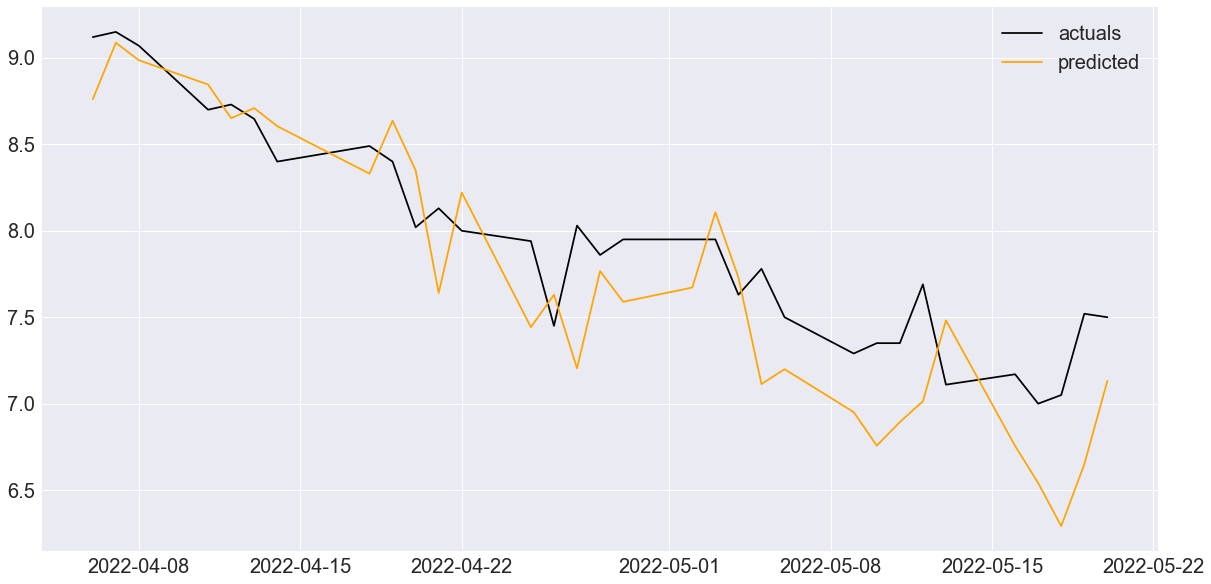

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['vrnof_next_close'], color='black')
ax.plot(y_test0['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## VRNOF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_vrnof, df_etfs, on='Date', how='left')
df1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520               NaN   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   NaN  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   NaN  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   NaN  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   NaN  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   NaN  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.078   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.095   7.940000   8.030000   7.605000   7.620000   
2022-05-19                -0.058   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.026   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            vrnof_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2021-02-18                  True    False    False   False     False   
2021-02-19                  True    False    False   False     False   
2021-02-22                  True    False    False   False     False   
2021-02-23                  True    False    False   False     False   
2021-02-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   0.0  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   0.0  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   0.0  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   0.0  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   0.0  23.820000  24.327999  23.270000  24.280001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-02-18    2585600      25.500000      24.959999 -1.299999   -0.050980   
2021-02-19    2299700      24.200001      24.049999  0.759998    0.031405   
2021-02-22    2447800      24.959999      23.260000 -0.910000   -0.036458   
2021-02-23    3856500      24.049999      24.280001 -0.789999   -0.032848   
2021-02-24    2125100      23.260000      22.850000  1.020001    0.043852   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-02-18          25.238001            -1.802              26.067   
2021-02-19          25.222000            -0.016              26.210   
2021-02-22          25.124000            -0.098              26.279   
2021-02-23          24.394000            -0.730              26.057   
2021-02-24          24.150000            -0.244              25.595   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-02-18              0.090  51.509998  51.520000  49.570000   49.759998   
2021-02-19              0.143  50.430000  52.209999  50.250000   51.939999   
2021-02-22              0.069  51.660000  51.773998  50.570000   51.000000   
2021-02-23             -0.222  49.700001  50.674999  46.279999   50.619999   
2021-02-24             -0.462  50.680000  51.080002  50.099998   50.470001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-02-18    1010700.0        51.520000        51.939999  -1.760002   
2021-02-19     8

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520          0.000000   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                 0.000  25.719999  26.100000  24.200001  24.200001   
2021-02-19                 0.000  24.620001  25.260000  24.318001  24.959999   
2021-02-22                 0.000  24.580000  24.860001  24.049999  24.049999   
2021-02-23                 0.000  23.020000  23.430000  21.610001  23.260000   
2021-02-24                 0.000  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.078   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.095   7.940000   8.030000   7.605000   7.620000   
2022-05-19                -0.058   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.026   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2    7.330000    7.350000   7.020000   
2022-05-18      5   18  2022        2    7.132000    7.270000   6.770000   
2022-05-19      5   19  2022        2    6.905000    7.220000   6.880000   
2022-05-20      5   20  2022        2    6.951000    7.530000   6.800000   
2022-05-23      5   23  2022        2    6.940000    7.620000   6.940000   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   
...                 ...           ...               ...               ...   
2022-05-17     7.170000        279500             7.110          7.000000   
2022-05-18     7.000000        409900             7.170          7.050000   
2022-05-19     7.050000        169700             7.000          7.520000   
2022-05-20     7.520000        196000             7.050          7.500000   
2022-05-23     7.500000        216400             7.520          0.000000   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   
...                ...            ...                   ...   
2022-05-17    0.060000       0.008439                7.3340   
2022-05-18   -0.170000      -0.023710                7.2640   
2022-05-19    0.050000       0.007143                7.2040   
2022-05-20    0.470000       0.066667                7.1700   
2022-05-23   -0.020000      -0.002660                7.2480   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                0.000                  0.000                 0.000   
2021-02-19                0.000                  0.000                 0.000   
2021-02-22                0.000                  0.000                 0.000   
2021-02-23                0.000                  0.000                 0.000   
2021-02-24                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-17               -0.024                  7.482                -0.078   
2022-05-18               -0.070                  7.387                -0.095   
2022-05-19               -0.060                  7.329                -0.058   
2022-05-20               -0.034                  7.303                -0.026   
2022-05-23                0.078                  7.303                 0.000   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2021-02-18  25.719999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

286

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

286
32


In [52]:
X_train1 = train1.drop('vrnof_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2021-02-18                    0.0                   0.0  25.719999  26.100000   
2021-02-19                    0.0                   0.0  24.620001  25.260000   
2021-02-22                    0.0                   0.0  24.580000  24.860001   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2021-02-18  24.200001  24.200001    2585600      25.500000      24.959999   
2021-02-19  24.318001  24.959999    2299700      24.200001      24.049999   
2021-02-22  24.049999  24.049999    2447800      24.959999      23.260000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2021-02-18 -1.299999   -0.050980          25.238001            -1.802   
2021-02-19  0.759998    0.031405          25.222000            -0.016   
2021-02-22 -0.910000   -0.036458          25.124000            -0.098   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-02-18              26.067              0.090  51.509998  51.520000   
2021-02-19              26.210              0.143  50.430000  52.209999   
2021-02-22              26.279              0.069  51.660000  51.773998   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-02-18     49.57   49.759998    1010700.0        51.520000   
2021-02-19     50.25   51.939999     834700.0        49.759998   
2021-02-22     50.57   51.000000     790300.0        51.939999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-02-18        51.939999  -1.760002     -0.034162            51.484000   
2021-02-19        51.000000   2.180001      0.043810            51.575999   
2021-02-22        50.619999  -0.939999     -0.018098            51.431999   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-02-18              -1.058                51.506                0.260   
2021-02-19               0.092                51.800                0.294   
2021-02-22              -0.144                51.975                0.175   

            yolo_Open  yolo_High   yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                   
2021-02-18  27.900000  27.959999  26.549999   26.650000     581200.0   
2021-02-19  27.209999  27.690001  26.905001   27.690001     5

In [53]:
X_train1.shape

(286, 159)

In [54]:
y_train1 = train1['vrnof_next_close']
y_train1.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('vrnof_next_close', axis=1)
y_test1 = test1['vrnof_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-04-06      4    6  2022        2        9.24       9.280       8.82   
2022-04-07      4    7  2022        2        8.75       9.140       8.56   
2022-04-08      4    8  2022        2        8.89       9.355       8.88   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-04-06         9.00        518700              9.19       -0.19   
2022-04-07         9.12        822500              9.00        0.12   
2022-04-08         9.15        322400              9.12        0.03   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-04-06      -0.020675                 9.604               -0.212   
2022-04-07       0.013333                 9.440               -0.164   
2022-04-08       0.003289                 9.260               -0.180   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-04-06                  9.846                -0.128    10.10   10.170   
2022-04-07                  9.737                -0.109     9.86    9.860   
2022-04-08                  9.619                -0.118     9.49    9.548   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-04-06   9.780      9.83    1755000          10.00           9.48   
2022-04-07   9.351      9.48    1185600           9.83           9.34   
2022-04-08   9.290      9.34     596200           9.48           9.39   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-04-06    -0.17   -0.017000             10.208            -0.166   
2022-04-07    -0.35   -0.035605             10.030            -0.178   
2022-04-08    -0.14   -0.014768              9.826            -0.204   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-04-06              10.505              0.004  20.010000  20.049999   
2022-04-07              10.397             -0.108  19.530001  19.930000   
2022-04-08              10.209             -0.188  19.790001  20.097000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-04-06  19.270000   19.610001    1062300.0        20.180000   
2022-04-07  18.715000   19.920000    1084200.0        19.610001   
2022-04-08  19.459999   19.730000     631200.0        19.920000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-04-06        19.920000  -0.569999     -0.028246               20.482   
2022-04-07        19.730000   0.309999      0.015808               20.294   
2022-04-08        19.139999  -0.190000     -0.009538               20.038   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-04-06              -0.244                20.554               -0.068   
2022-04-07              -0.188                20.499               -0.055   
2022-04-08              -0.256                20.393               -0.106   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-04-06      10.51      10.55    10.070       10.17      44500.0   
2022-04-07      10.13      10.15     9.760       10.15      79500.0   
2022-04-08      10.15      10.18 

In [58]:
X_test1.shape

(32, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([9.19942736, 9.17859413, 8.87310443, 8.61370866, 8.41290266])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.24959147542678178


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.20220644310344238


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['vrnof_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['vrnof_next_close'])

In [65]:
y_test1['vrnof_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               6.637250
2022-05-17              7.00               6.972470
2022-05-18              7.05               7.099378
2022-05-19              7.52               7.448029
2022-05-20              7.50               7.297171

In [67]:
hyper_table.append(dict(stock='vrnof', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['vrnof_next_close'][-1],
                        predicted_price=y_test1['vrnof_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

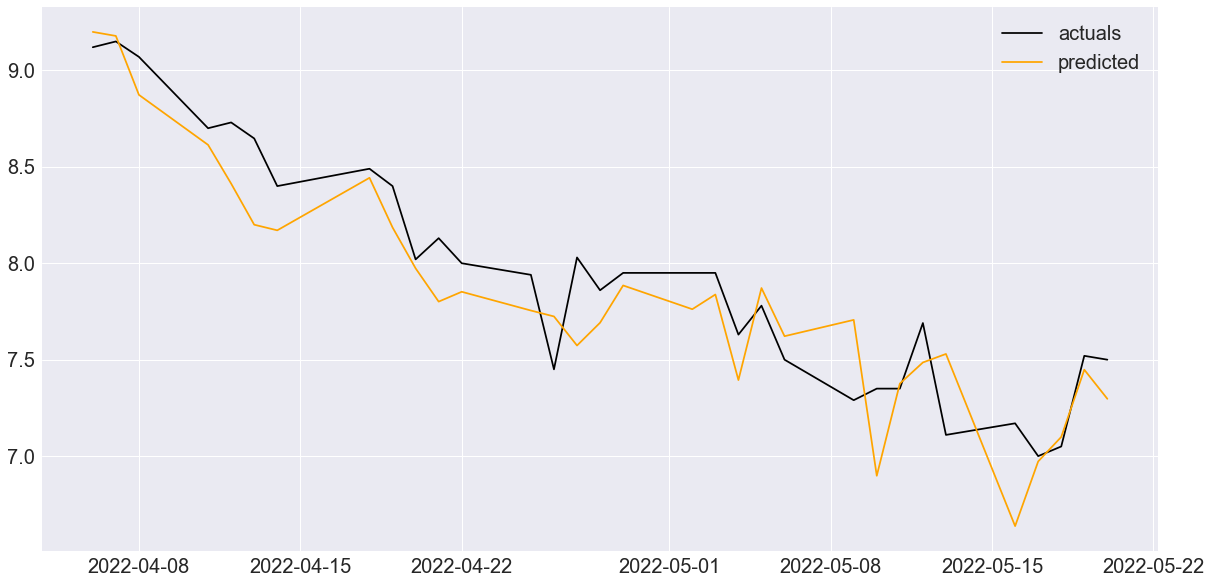

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['vrnof_next_close'], color='black')
ax.plot(y_test1['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## VRNOF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_vrnof, df_etfs_dow, on='Date', how='left')
df2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520               NaN   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   NaN  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   NaN  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   NaN  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   NaN  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   NaN  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.078   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.095   7.940000   8.030000   7.605000   7.620000   
2022-05-19                -0.058   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.026   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            vrnof_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2021-02-18                  True    False    False   False     False   
2021-02-19                  True    False    False   False     False   
2021-02-22                  True    False    False   False     False   
2021-02-23                  True    False    False   False     False   
2021-02-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   0.0  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   0.0  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   0.0  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   0.0  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   0.0  23.820000  24.327999  23.270000  24.280001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-02-18    2585600      25.500000      24.959999 -1.299999   -0.050980   
2021-02-19    2299700      24.200001      24.049999  0.759998    0.031405   
2021-02-22    2447800      24.959999      23.260000 -0.910000   -0.036458   
2021-02-23    3856500      24.049999      24.280001 -0.789999   -0.032848   
2021-02-24    2125100      23.260000      22.850000  1.020001    0.043852   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-02-18          25.238001            -1.802              26.067   
2021-02-19          25.222000            -0.016              26.210   
2021-02-22          25.124000            -0.098              26.279   
2021-02-23          24.394000            -0.730              26.057   
2021-02-24          24.150000            -0.244              25.595   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-02-18              0.090  51.509998  51.520000  49.570000   49.759998   
2021-02-19              0.143  50.430000  52.209999  50.250000   51.939999   
2021-02-22              0.069  51.660000  51.773998  50.570000   51.000000   
2021-02-23             -0.222  49.700001  50.674999  46.279999   50.619999   
2021-02-24             -0.462  50.680000  51.080002  50.099998   50.470001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-02-18    1010700.0        51.520000        51.939999  -1.760002   
2021-02-19     8

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-17    7.330000    7.350000   7.020000     7.170000        279500   
2022-05-18    7.132000    7.270000   6.770000     7.000000        409900   
2022-05-19    6.905000    7.220000   6.880000     7.050000        169700   
2022-05-20    6.951000    7.530000   6.800000     7.520000        196000   
2022-05-23    6.940000    7.620000   6.940000     7.500000        216400   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-17             7.110          7.000000    0.060000       0.008439   
2022-05-18             7.170          7.050000   -0.170000      -0.023710   
2022-05-19             7.000          7.520000    0.050000       0.007143   
2022-05-20             7.050          7.500000    0.470000       0.066667   
2022-05-23             7.520          0.000000   -0.020000      -0.002660   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17                7.3340               -0.024                  7.482   
2022-05-18                7.2640               -0.070                  7.387   
2022-05-19                7.2040               -0.060                  7.329   
2022-05-20                7.1700               -0.034                  7.303   
2022-05-23                7.2480                0.078                  7.303   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                 0.000  25.719999  26.100000  24.200001  24.200001   
2021-02-19                 0.000  24.620001  25.260000  24.318001  24.959999   
2021-02-22                 0.000  24.580000  24.860001  24.049999  24.049999   
2021-02-23                 0.000  23.020000  23.430000  21.610001  23.260000   
2021-02-24                 0.000  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.078   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.095   7.940000   8.030000   7.605000   7.620000   
2022-05-19                -0.058   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.026   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2    7.330000    7.350000   7.020000   
2022-05-18      5   18  2022        2    7.132000    7.270000   6.770000   
2022-05-19      5   19  2022        2    6.905000    7.220000   6.880000   
2022-05-20      5   20  2022        2    6.951000    7.530000   6.800000   
2022-05-23      5   23  2022        2    6.940000    7.620000   6.940000   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   
...                 ...           ...               ...               ...   
2022-05-17     7.170000        279500             7.110          7.000000   
2022-05-18     7.000000        409900             7.170          7.050000   
2022-05-19     7.050000        169700             7.000          7.520000   
2022-05-20     7.520000        196000             7.050          7.500000   
2022-05-23     7.500000        216400             7.520          0.000000   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   
...                ...            ...                   ...   
2022-05-17    0.060000       0.008439                7.3340   
2022-05-18   -0.170000      -0.023710                7.2640   
2022-05-19    0.050000       0.007143                7.2040   
2022-05-20    0.470000       0.066667                7.1700   
2022-05-23   -0.020000      -0.002660                7.2480   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                0.000                  0.000                 0.000   
2021-02-19                0.000                  0.000                 0.000   
2021-02-22                0.000                  0.000                 0.000   
2021-02-23                0.000                  0.000                 0.000   
2021-02-24                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-17               -0.024                  7.482                -0.078   
2022-05-18               -0.070                  7.387                -0.095   
2022-05-19               -0.060                  7.329                -0.058   
2022-05-20               -0.034                  7.303                -0.026   
2022-05-23                0.078                  7.303                 0.000   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2021-02-18  25.719999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

286

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

286
32


In [82]:
X_train2 = train2.drop('vrnof_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2021-02-18                    0.0                   0.0  25.719999  26.100000   
2021-02-19                    0.0                   0.0  24.620001  25.260000   
2021-02-22                    0.0                   0.0  24.580000  24.860001   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2021-02-18  24.200001  24.200001    2585600      25.500000      24.959999   
2021-02-19  24.318001  24.959999    2299700      24.200001      24.049999   
2021-02-22  24.049999  24.049999    2447800      24.959999      23.260000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2021-02-18 -1.299999   -0.050980          25.238001            -1.802   
2021-02-19  0.759998    0.031405          25.222000            -0.016   
2021-02-22 -0.910000   -0.036458          25.124000            -0.098   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-02-18              26.067              0.090  51.509998  51.520000   
2021-02-19              26.210              0.143  50.430000  52.209999   
2021-02-22              26.279              0.069  51.660000  51.773998   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-02-18     49.57   49.759998    1010700.0        51.520000   
2021-02-19     50.25   51.939999     834700.0        49.759998   
2021-02-22     50.57   51.000000     790300.0        51.939999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-02-18        51.939999  -1.760002     -0.034162            51.484000   
2021-02-19        51.000000   2.180001      0.043810            51.575999   
2021-02-22        50.619999  -0.939999     -0.018098            51.431999   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-02-18              -1.058                51.506                0.260   
2021-02-19               0.092                51.800                0.294   
2021-02-22              -0.144                51.975                0.175   

            yolo_Open  yolo_High   yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                   
2021-02-18  27.900000  27.959999  26.549999   26.650000     581200.0   
2021-02-19  27.209999  27.690001  26.905001   27.690001     5

In [83]:
X_train2.shape

(286, 185)

In [84]:
y_train2 = train2['vrnof_next_close']
y_train2.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('vrnof_next_close', axis=1)
y_test2 = test2['vrnof_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-04-06      4    6  2022        2        9.24       9.280       8.82   
2022-04-07      4    7  2022        2        8.75       9.140       8.56   
2022-04-08      4    8  2022        2        8.89       9.355       8.88   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-04-06         9.00        518700              9.19       -0.19   
2022-04-07         9.12        822500              9.00        0.12   
2022-04-08         9.15        322400              9.12        0.03   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-04-06      -0.020675                 9.604               -0.212   
2022-04-07       0.013333                 9.440               -0.164   
2022-04-08       0.003289                 9.260               -0.180   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-04-06                  9.846                -0.128    10.10   10.170   
2022-04-07                  9.737                -0.109     9.86    9.860   
2022-04-08                  9.619                -0.118     9.49    9.548   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-04-06   9.780      9.83    1755000          10.00           9.48   
2022-04-07   9.351      9.48    1185600           9.83           9.34   
2022-04-08   9.290      9.34     596200           9.48           9.39   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-04-06    -0.17   -0.017000             10.208            -0.166   
2022-04-07    -0.35   -0.035605             10.030            -0.178   
2022-04-08    -0.14   -0.014768              9.826            -0.204   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-04-06              10.505              0.004  20.010000  20.049999   
2022-04-07              10.397             -0.108  19.530001  19.930000   
2022-04-08              10.209             -0.188  19.790001  20.097000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-04-06  19.270000   19.610001    1062300.0        20.180000   
2022-04-07  18.715000   19.920000    1084200.0        19.610001   
2022-04-08  19.459999   19.730000     631200.0        19.920000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-04-06        19.920000  -0.569999     -0.028246               20.482   
2022-04-07        19.730000   0.309999      0.015808               20.294   
2022-04-08        19.139999  -0.190000     -0.009538               20.038   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-04-06              -0.244                20.554               -0.068   
2022-04-07              -0.188                20.499               -0.055   
2022-04-08              -0.256                20.393               -0.106   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-04-06      10.51      10.55    10.070       10.17      44500.0   
2022-04-07      10.13      10.15     9.760       10.15      79500.0   
2022-04-08      10.15      10.18 

In [88]:
X_test2.shape

(32, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([9.09874817, 9.29321814, 8.99995761, 8.56541526, 8.48683846])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.33638065705564324


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.2648835531534323


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['vrnof_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['vrnof_next_close'])

In [95]:
y_test2['vrnof_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               6.830982
2022-05-17              7.00               7.418344
2022-05-18              7.05               7.422345
2022-05-19              7.52               7.861842
2022-05-20              7.50               7.611490

In [97]:
hyper_table.append(dict(stock='vrnof', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['vrnof_next_close'][-1],
                        predicted_price=y_test2['vrnof_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

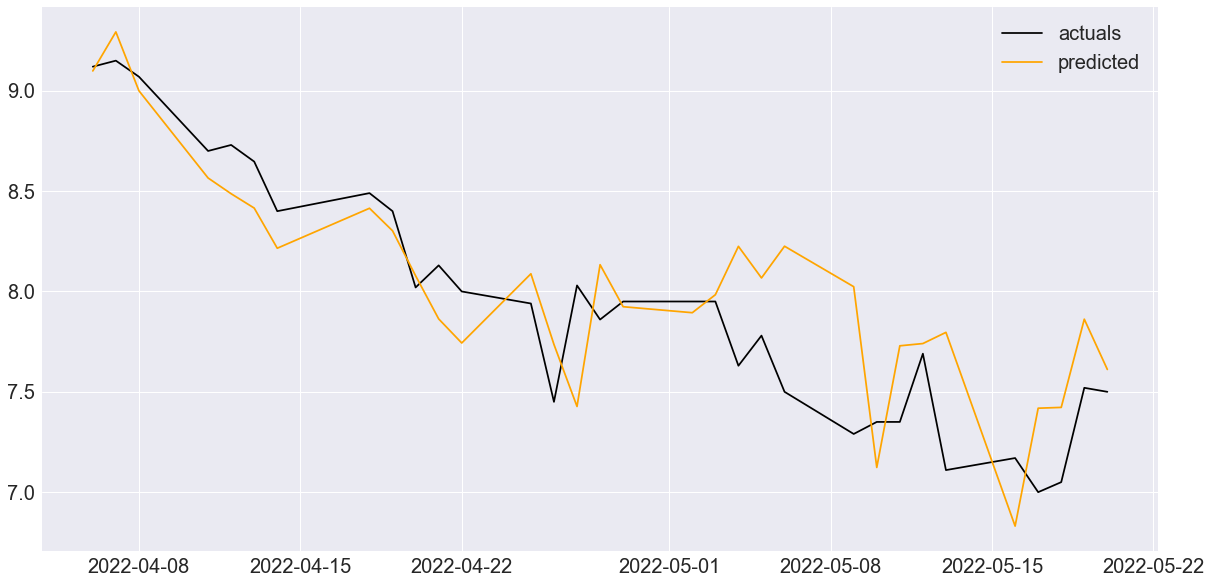

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['vrnof_next_close'], color='black')
ax.plot(y_test2['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829      15.750   16.000000   
2021-02-19               42.689              -0.551      15.200   16.010000   
2021-02-22               42.097              -0.592      15.830   16.139999   
2021-02-23               41.241              -0.856      15.390   15.862000   
2021-02-24               39.892              -1.349      15.650   15.950000   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973    4.100000   
2022-05-18                5.651              -0.108       3.990    4.070000   
2022-05-19                5.631              -0.020       3.990    4.030000   
2022-05-20                5.586              -0.045       3.990    4.200000   
2022-05-23                5.550              -0.036       4.210    4.220000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

286

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

286
32


In [112]:
X_train3 = train3.drop('vrnof_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [113]:
X_train3.shape

(286, 263)

In [114]:
y_train3 = train3['vrnof_next_close']
y_train3.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('vrnof_next_close', axis=1)
y_test3 = test3['vrnof_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-04-06      4    6  2022        2      7.48     7.650     7.01       7.18   
2022-04-07      4    7  2022        2      7.09     7.115     6.52       6.72   
2022-04-08      4    8  2022        2      6.79     6.905     6.55       6.70   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-04-06     8683100            7.39            6.72     -0.21    -0.028417   
2022-04-07     6405400            7.18            6.70     -0.46    -0.064067   
2022-04-08     4356900            6.72            6.89     -0.02    -0.002976   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-04-06               7.458             -0.156                7.781   
2022-04-07               7.286             -0.172                7.663   
2022-04-08               7.152             -0.134                7.464   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-04-06               0.009        6.16        6.16       5.55   
2022-04-07              -0.118        5.77        5.87       5.51   
2022-04-08              -0.199        6.00        6.05       5.53   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-04-06         5.77      878500.0              5.88             5.870   
2022-04-07         5.87      590100.0              5.77             5.600   
2022-04-08         5.60      710000.0              5.87             5.685   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-04-06       -0.11      -0.018707                5.9988   
2022-04-07        0.10       0.017331                5.9718   
2022-04-08       -0.27      -0.045997                5.8434   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-04-06              -0.0480                 5.9784                -0.027   
2022-04-07              -0.0270                 5.9834                 0.005   
2022-04-08              -0.1284                 5.9414                -0.042   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-04-06       3.83       3.83      3.62        3.66    2406600.0   
2022-04-07       3.74       3.75      3.49        3.57    2024000.0   
2022-04-08       3.54       3.57      3.47        3.48    1317500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-04-06             3.82             3.57      -0.16     -0.041885   
2022-04-07             3.66             3.48      -0.09     -0.024590   
2022-04-08             3.57             3.42      -0.09     -0.025210   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-04-06                3.838              -0.082                 3.946   
2022-04-07                3.774              -0.064                 3.904   
2022-04-08                3.690              -0.084                 3.827   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-04-06               -0.001       6.785       7.102       6.70   
2022-04-07               -0.042       6.510       7.000       

In [118]:
X_test3.shape

(32, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([9.30503996, 9.00978034, 8.63430878, 8.36678445, 8.2318129 ])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.7172519514265222


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.628840717771769


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['vrnof_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['vrnof_next_close'])

In [125]:
y_test3['vrnof_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               6.259560
2022-05-17              7.00               6.945935
2022-05-18              7.05               6.542820
2022-05-19              7.52               6.537121
2022-05-20              7.50               6.335751

In [127]:
hyper_table.append(dict(stock='vrnof', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['vrnof_next_close'][-1],
                        predicted_price=y_test3['vrnof_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

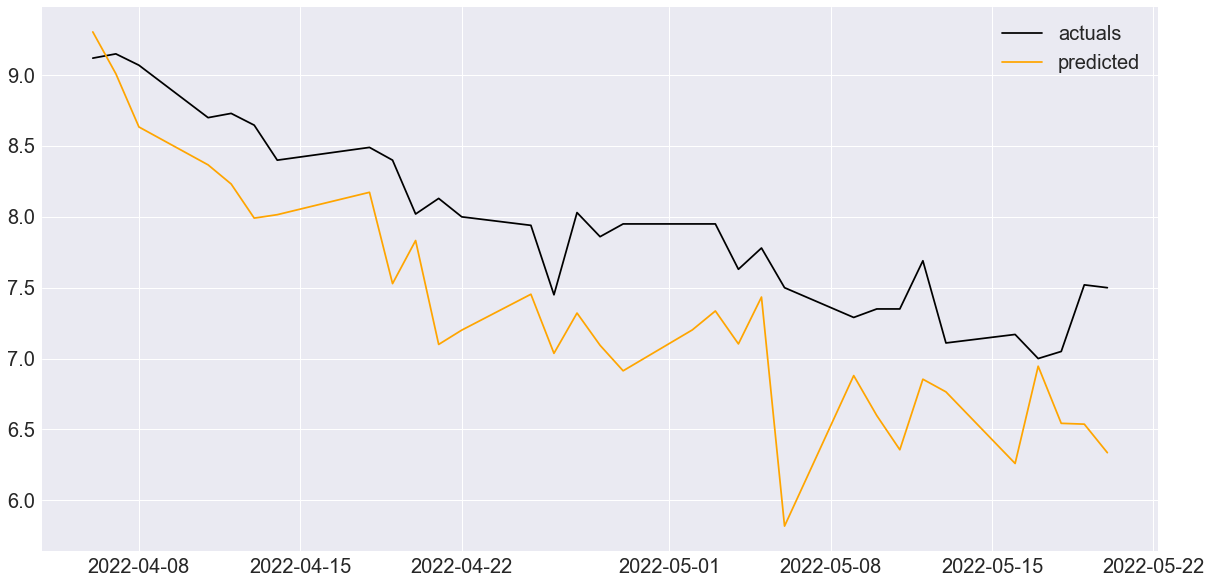

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['vrnof_next_close'], color='black')
ax.plot(y_test3['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829      15.750   16.000000   
2021-02-19               42.689              -0.551      15.200   16.010000   
2021-02-22               42.097              -0.592      15.830   16.139999   
2021-02-23               41.241              -0.856      15.390   15.862000   
2021-02-24               39.892              -1.349      15.650   15.950000   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973    4.100000   
2022-05-18                5.651              -0.108       3.990    4.070000   
2022-05-19                5.631              -0.020       3.990    4.030000   
2022-05-20                5.586              -0.045       3.990    4.200000   
2022-05-23                5.550              -0.036       4.210    4.220000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

286

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

286
32


In [142]:
X_train4 = train4.drop('vrnof_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [143]:
X_train4.shape

(286, 289)

In [144]:
y_train4 = train4['vrnof_next_close']
y_train4.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('vrnof_next_close', axis=1)
y_test4 = test4['vrnof_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-04-06      4    6  2022        2      7.48     7.650     7.01       7.18   
2022-04-07      4    7  2022        2      7.09     7.115     6.52       6.72   
2022-04-08      4    8  2022        2      6.79     6.905     6.55       6.70   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-04-06     8683100            7.39            6.72     -0.21    -0.028417   
2022-04-07     6405400            7.18            6.70     -0.46    -0.064067   
2022-04-08     4356900            6.72            6.89     -0.02    -0.002976   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-04-06               7.458             -0.156                7.781   
2022-04-07               7.286             -0.172                7.663   
2022-04-08               7.152             -0.134                7.464   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-04-06               0.009        6.16        6.16       5.55   
2022-04-07              -0.118        5.77        5.87       5.51   
2022-04-08              -0.199        6.00        6.05       5.53   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-04-06         5.77      878500.0              5.88             5.870   
2022-04-07         5.87      590100.0              5.77             5.600   
2022-04-08         5.60      710000.0              5.87             5.685   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-04-06       -0.11      -0.018707                5.9988   
2022-04-07        0.10       0.017331                5.9718   
2022-04-08       -0.27      -0.045997                5.8434   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-04-06              -0.0480                 5.9784                -0.027   
2022-04-07              -0.0270                 5.9834                 0.005   
2022-04-08              -0.1284                 5.9414                -0.042   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-04-06       3.83       3.83      3.62        3.66    2406600.0   
2022-04-07       3.74       3.75      3.49        3.57    2024000.0   
2022-04-08       3.54       3.57      3.47        3.48    1317500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-04-06             3.82             3.57      -0.16     -0.041885   
2022-04-07             3.66             3.48      -0.09     -0.024590   
2022-04-08             3.57             3.42      -0.09     -0.025210   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-04-06                3.838              -0.082                 3.946   
2022-04-07                3.774              -0.064                 3.904   
2022-04-08                3.690              -0.084                 3.827   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-04-06               -0.001       6.785       7.102       6.70   
2022-04-07               -0.042       6.510       7.000       

In [148]:
X_test4.shape

(32, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([9.40165374, 8.9697151 , 8.84215443, 8.65046021, 8.40862779])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.5866102728270758


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.4511359249420511


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['vrnof_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['vrnof_next_close'])

In [155]:
y_test4['vrnof_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               6.376202
2022-05-17              7.00               6.970326
2022-05-18              7.05               6.616455
2022-05-19              7.52               6.447103
2022-05-20              7.50               6.106884

In [157]:
hyper_table.append(dict(stock='vrnof', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['vrnof_next_close'][-1],
                        predicted_price=y_test4['vrnof_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

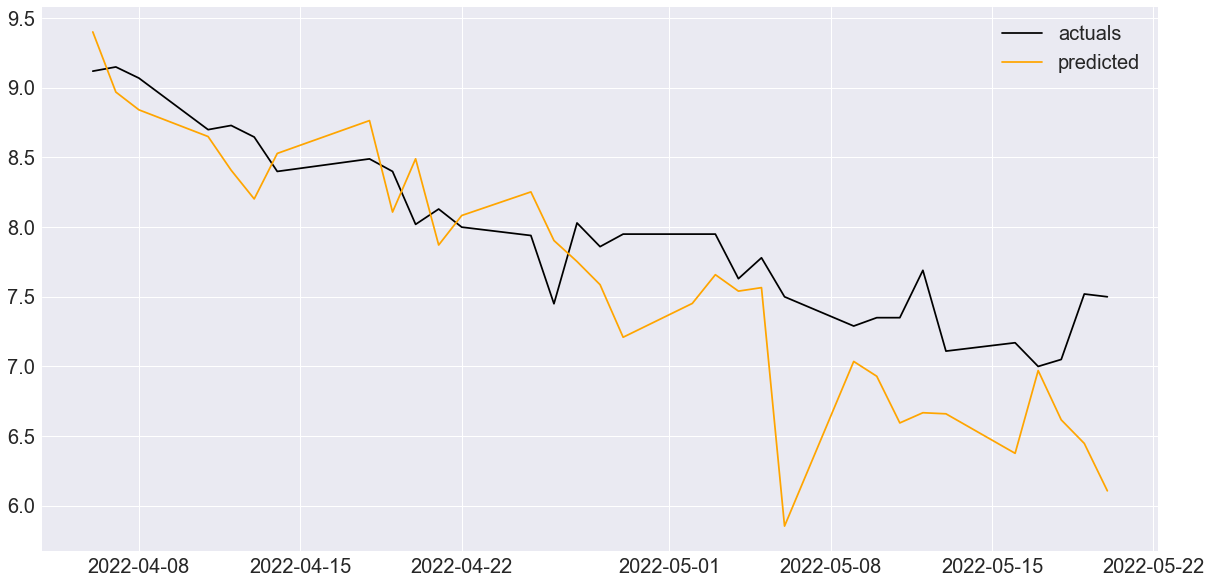

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['vrnof_next_close'], color='black')
ax.plot(y_test4['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829      15.750   16.000000   
2021-02-19               42.689              -0.551      15.200   16.010000   
2021-02-22               42.097              -0.592      15.830   16.139999   
2021-02-23               41.241              -0.856      15.390   15.862000   
2021-02-24               39.892              -1.349      15.650   15.950000   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973    4.100000   
2022-05-18                5.651              -0.108       3.990    4.070000   
2022-05-19                5.631              -0.020       3.990    4.030000   
2022-05-20                5.586              -0.045       3.990    4.200000   
2022-05-23                5.550              -0.036       4.210    4.220000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

286

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

286
32


In [172]:
X_train5 = train5.drop('vrnof_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [173]:
X_train5.shape

(286, 393)

In [174]:
y_train5 = train5['vrnof_next_close']
y_train5.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('vrnof_next_close', axis=1)
y_test5 = test5['vrnof_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-04-06      4    6  2022        2      7.48     7.650     7.01       7.18   
2022-04-07      4    7  2022        2      7.09     7.115     6.52       6.72   
2022-04-08      4    8  2022        2      6.79     6.905     6.55       6.70   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-04-06     8683100            7.39            6.72     -0.21    -0.028417   
2022-04-07     6405400            7.18            6.70     -0.46    -0.064067   
2022-04-08     4356900            6.72            6.89     -0.02    -0.002976   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-04-06               7.458             -0.156                7.781   
2022-04-07               7.286             -0.172                7.663   
2022-04-08               7.152             -0.134                7.464   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-04-06               0.009        6.16        6.16       5.55   
2022-04-07              -0.118        5.77        5.87       5.51   
2022-04-08              -0.199        6.00        6.05       5.53   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-04-06         5.77      878500.0              5.88             5.870   
2022-04-07         5.87      590100.0              5.77             5.600   
2022-04-08         5.60      710000.0              5.87             5.685   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-04-06       -0.11      -0.018707                5.9988   
2022-04-07        0.10       0.017331                5.9718   
2022-04-08       -0.27      -0.045997                5.8434   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-04-06              -0.0480                 5.9784                -0.027   
2022-04-07              -0.0270                 5.9834                 0.005   
2022-04-08              -0.1284                 5.9414                -0.042   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-04-06       3.83       3.83      3.62        3.66    2406600.0   
2022-04-07       3.74       3.75      3.49        3.57    2024000.0   
2022-04-08       3.54       3.57      3.47        3.48    1317500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-04-06             3.82             3.57      -0.16     -0.041885   
2022-04-07             3.66             3.48      -0.09     -0.024590   
2022-04-08             3.57             3.42      -0.09     -0.025210   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-04-06                3.838              -0.082                 3.946   
2022-04-07                3.774              -0.064                 3.904   
2022-04-08                3.690              -0.084                 3.827   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-04-06               -0.001       6.785       7.102       6.70   
2022-04-07               -0.042       6.510       7.000       

In [178]:
X_test5.shape

(32, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([9.47438524, 9.21074895, 8.49163113, 8.26248032, 8.16505322])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.6369136906650252


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5157910410283546


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['vrnof_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['vrnof_next_close'])

In [185]:
y_test5['vrnof_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               7.368662
2022-05-17              7.00               8.020622
2022-05-18              7.05               8.635650
2022-05-19              7.52               8.708728
2022-05-20              7.50               8.768746

In [187]:
hyper_table.append(dict(stock='vrnof', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['vrnof_next_close'][-1],
                        predicted_price=y_test5['vrnof_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

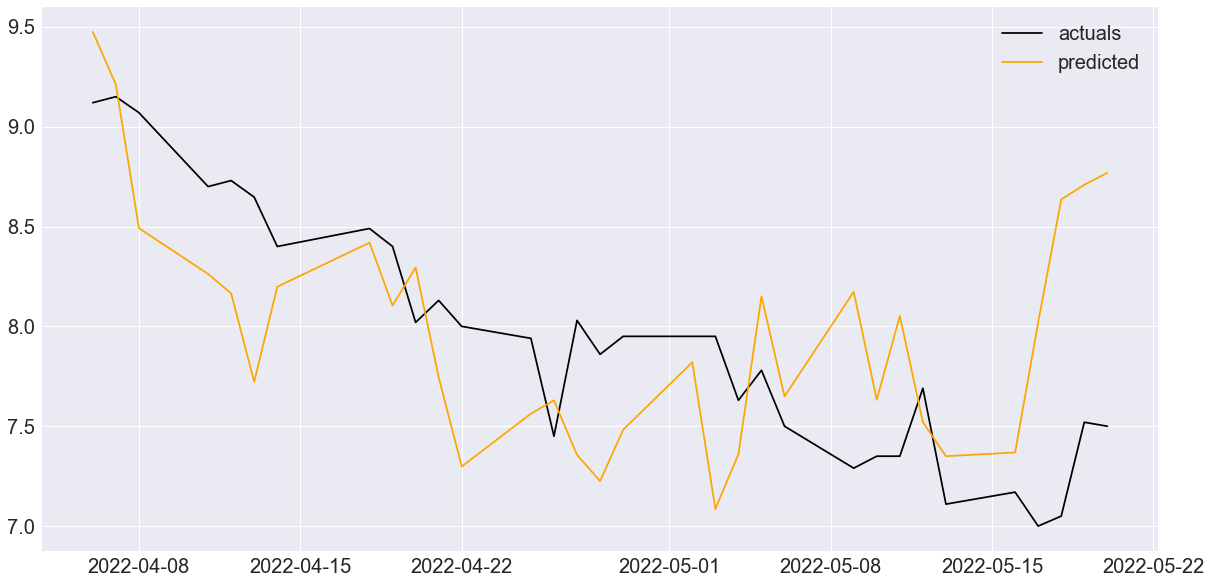

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['vrnof_next_close'], color='black')
ax.plot(y_test5['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829      15.750   16.000000   
2021-02-19               42.689              -0.551      15.200   16.010000   
2021-02-22               42.097              -0.592      15.830   16.139999   
2021-02-23               41.241              -0.856      15.390   15.862000   
2021-02-24               39.892              -1.349      15.650   15.950000   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973    4.100000   
2022-05-18                5.651              -0.108       3.990    4.070000   
2022-05-19                5.631              -0.020       3.990    4.030000   
2022-05-20                5.586              -0.045       3.990    4.200000   
2022-05-23                5.550              -0.036       4.210    4.220000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

286

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

286
32


In [202]:
X_train6 = train6.drop('vrnof_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [203]:
X_train6.shape

(286, 419)

In [204]:
y_train6 = train6['vrnof_next_close']
y_train6.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2022-04-01    9.84
2022-04-04    9.19
2022-04-05    9.00
Name: vrnof_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('vrnof_next_close', axis=1)
y_test6 = test6['vrnof_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-04-06      4    6  2022        2      7.48     7.650     7.01       7.18   
2022-04-07      4    7  2022        2      7.09     7.115     6.52       6.72   
2022-04-08      4    8  2022        2      6.79     6.905     6.55       6.70   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-04-06     8683100            7.39            6.72     -0.21    -0.028417   
2022-04-07     6405400            7.18            6.70     -0.46    -0.064067   
2022-04-08     4356900            6.72            6.89     -0.02    -0.002976   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-04-06               7.458             -0.156                7.781   
2022-04-07               7.286             -0.172                7.663   
2022-04-08               7.152             -0.134                7.464   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-04-06               0.009        6.16        6.16       5.55   
2022-04-07              -0.118        5.77        5.87       5.51   
2022-04-08              -0.199        6.00        6.05       5.53   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-04-06         5.77      878500.0              5.88             5.870   
2022-04-07         5.87      590100.0              5.77             5.600   
2022-04-08         5.60      710000.0              5.87             5.685   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-04-06       -0.11      -0.018707                5.9988   
2022-04-07        0.10       0.017331                5.9718   
2022-04-08       -0.27      -0.045997                5.8434   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-04-06              -0.0480                 5.9784                -0.027   
2022-04-07              -0.0270                 5.9834                 0.005   
2022-04-08              -0.1284                 5.9414                -0.042   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-04-06       3.83       3.83      3.62        3.66    2406600.0   
2022-04-07       3.74       3.75      3.49        3.57    2024000.0   
2022-04-08       3.54       3.57      3.47        3.48    1317500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-04-06             3.82             3.57      -0.16     -0.041885   
2022-04-07             3.66             3.48      -0.09     -0.024590   
2022-04-08             3.57             3.42      -0.09     -0.025210   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-04-06                3.838              -0.082                 3.946   
2022-04-07                3.774              -0.064                 3.904   
2022-04-08                3.690              -0.084                 3.827   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-04-06               -0.001       6.785       7.102       6.70   
2022-04-07               -0.042       6.510       7.000       

In [208]:
X_test6.shape

(32, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    7.05
2022-05-19    7.52
2022-05-20    7.50
Name: vrnof_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([9.99832358, 9.55018683, 8.81407151, 8.62285445, 8.06676702])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.8798899798519577


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.736248924095017


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['vrnof_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['vrnof_next_close'])

In [215]:
y_test6['vrnof_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-16              7.17               7.041832
2022-05-17              7.00               7.582362
2022-05-18              7.05               8.876422
2022-05-19              7.52               8.991112
2022-05-20              7.50               8.707582

In [217]:
hyper_table.append(dict(stock='vrnof', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['vrnof_next_close'][-1],
                        predicted_price=y_test6['vrnof_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

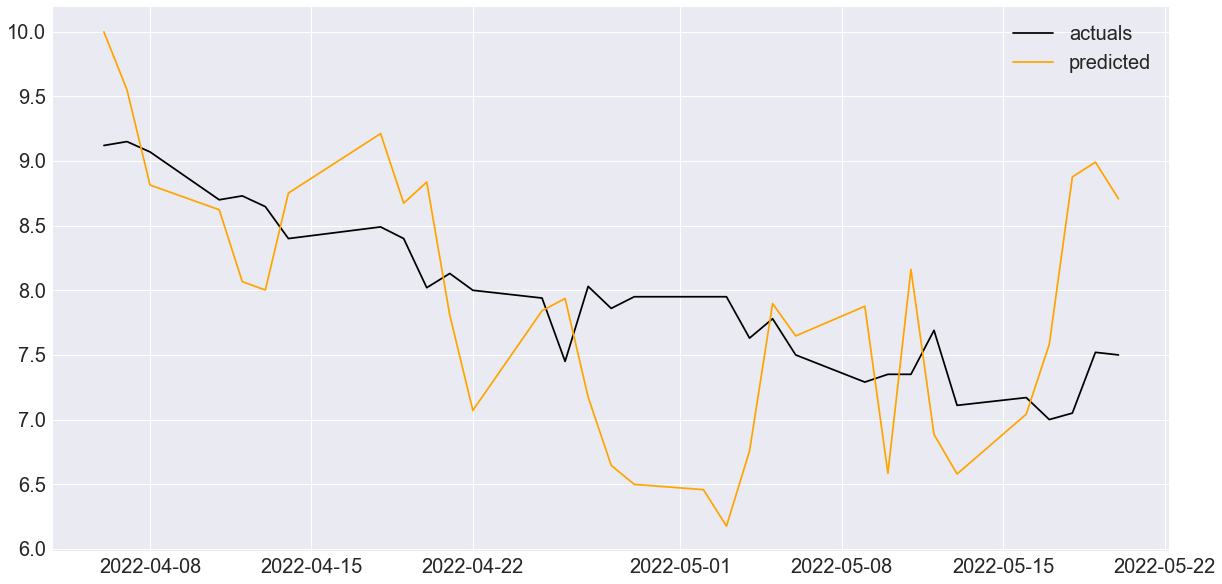

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['vrnof_next_close'], color='black')
ax.plot(y_test6['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1  vrnof        1+ETFs  LinearRegression()  0.249591  0.202206           7.5   
2  vrnof    1+ETFs+Dow  LinearRegression()  0.336381  0.264884           7.5   
0  vrnof         1+Dow  LinearRegression()  0.416871  0.350053           7.5   
4  vrnof       All+Dow  LinearRegression()  0.586610  0.451136           7.5   
5  vrnof      All+ETFs  LinearRegression()  0.636914  0.515791           7.5   
3  vrnof    All stocks  LinearRegression()  0.717252  0.628841           7.5   
6  vrnof  All+ETFs+Dow  LinearRegression()  0.879890  0.736249           7.5   

   predicted_price  rows  train_rows  test_rows  columns  
1         7.297171   318         286         32      160  
2         7.611490   318         286         32      186  
0         7.131395   318         286         32       56  
4         6.106884   318         286         32      290  
5         8.768746   318         286         32      394  
3         6.335751   318         286         32      264  
6         8.707582   318         286         32      420

In [220]:
hyper_table_vrnof = hyper_table.head(1)
hyper_table_vrnof

stock version               model      rmse       mae  actual_price  \
1  vrnof  1+ETFs  LinearRegression()  0.249591  0.202206           7.5   

   predicted_price  rows  train_rows  test_rows  columns  
1         7.297171   318         286         32      160

In [221]:
hyper_table_vrnof.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_vrnof.csv', index=True)

## Simulation - Sell

In [222]:
vrnof_sim = df1[n:]
vrnof_sim = vrnof_sim[['vrnof_Open', 'vrnof_Close']]
vrnof_sim.head()

vrnof_Open  vrnof_Close
Date                               
2022-04-06        9.24         9.00
2022-04-07        8.75         9.12
2022-04-08        8.89         9.15
2022-04-11        9.14         9.07
2022-04-12        9.20         8.70

In [223]:
vrnof_sim.shape

(32, 2)

In [224]:
vrnof_sim.tail()

vrnof_Open  vrnof_Close
Date                               
2022-05-16       7.780         7.11
2022-05-17       7.330         7.17
2022-05-18       7.132         7.00
2022-05-19       6.905         7.05
2022-05-20       6.951         7.52

In [225]:
vrnof_sim['vrnof_Pred_Close'] = y_pred1
vrnof_sim.head()

vrnof_Open  vrnof_Close  vrnof_Pred_Close
Date                                                 
2022-04-06        9.24         9.00          9.199427
2022-04-07        8.75         9.12          9.178594
2022-04-08        8.89         9.15          8.873104
2022-04-11        9.14         9.07          8.613709
2022-04-12        9.20         8.70          8.412903

In [226]:
vrnof_sim['Trade'] = vrnof_sim['vrnof_Pred_Close'] > vrnof_sim['vrnof_Open']
vrnof_sim.head()

vrnof_Open  vrnof_Close  vrnof_Pred_Close  Trade
Date                                                        
2022-04-06        9.24         9.00          9.199427  False
2022-04-07        8.75         9.12          9.178594   True
2022-04-08        8.89         9.15          8.873104  False
2022-04-11        9.14         9.07          8.613709  False
2022-04-12        9.20         8.70          8.412903  False

In [227]:
vrnof_sim = vrnof_sim[vrnof_sim['Trade']==True]
vrnof_sim.head()

vrnof_Open  vrnof_Close  vrnof_Pred_Close  Trade
Date                                                        
2022-04-07       8.750         9.12          9.178594   True
2022-04-28       7.470         8.03          7.691718   True
2022-05-02       7.560         7.95          7.761694   True
2022-05-06       7.594         7.78          7.621780   True
2022-05-09       7.450         7.50          7.706333   True

In [228]:
vrnof_sim['Gains'] = (vrnof_sim['vrnof_Close'] - vrnof_sim['vrnof_Open'])*100
vrnof_sim.head()

vrnof_Open  vrnof_Close  vrnof_Pred_Close  Trade  Gains
Date                                                               
2022-04-07       8.750         9.12          9.178594   True   37.0
2022-04-28       7.470         8.03          7.691718   True   56.0
2022-05-02       7.560         7.95          7.761694   True   39.0
2022-05-06       7.594         7.78          7.621780   True   18.6
2022-05-09       7.450         7.50          7.706333   True    5.0

In [229]:
total_gains = vrnof_sim['Gains'].sum()
print(round(total_gains, 2))

292.5
